## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [44]:
a=-2
b=1

x=np.linspace(0,20)
y = a * x + b

In [45]:
print(len(x) , len(y))

50 50


#### Plot your data points. 

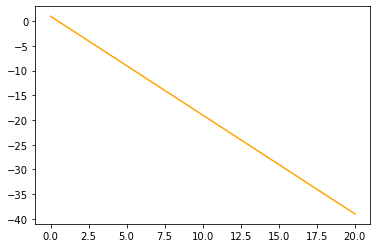

In [46]:
plt.plot(x , y , color = 'orange')

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

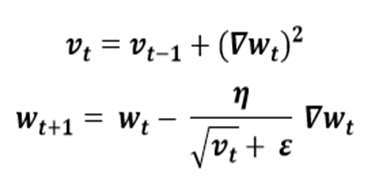

In [77]:
def Adagrad(x,y,alpha,epslon,Max_iterations):
    theta0=0
    theta1=1
    v0=0
    v1=0
    m=len(x)
    theta0all=[]
    theta1all=[]
    loss=[]
    hypoall=[]
    
    for i in range(Max_iterations):
        hypo=theta0 + theta1 * x
        hypoall.append(hypo)
        
        cost=(1/(2*m))*np.sum((hypo-y)**2)
        loss.append(cost)

        theta0all.append(theta0)
        theta1all.append(theta1)
        
        gradient0 = (1/m)*np.sum(hypo-y)
        v0 = v0 + (gradient0**2)
        theta0 = theta0 - (alpha/(np.sqrt(v0)+epslon)*gradient0)
        
        gradient1=(1/m)*np.sum((hypo-y)*x)
        v1 = v1 + (gradient1**2)
        theta1 = theta1 - (alpha/(np.sqrt(v1)+epslon)*gradient1)
        if cost < 0.1:
            print(f'it took {i+1} iterations')
            break
    return theta0all,theta1all,loss,hypo ,hypoall,theta0,theta1

In [78]:
theta0all,theta1all,loss,hypo,hypoall,theta0,theta1 = Adagrad(x,y,0.9,1e-8,100)

### Calculating R2 score

In [79]:
r2 = r2_score(hypo , y)
print(r2)

0.9888395661629988


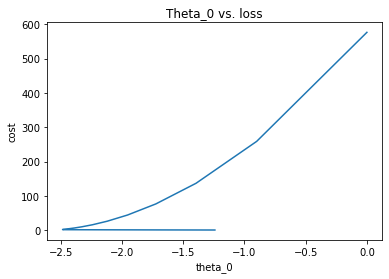

In [80]:
plt.plot(theta0all, loss)
plt.xlabel('theta_0')
plt.ylabel('cost')
plt.title('Theta_0 vs. loss')
plt.show()

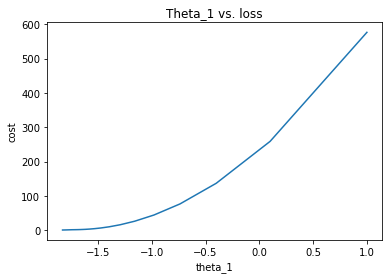

In [81]:
plt.plot(theta1all, loss)
plt.xlabel('theta_1')
plt.ylabel('cost')
plt.title('Theta_1 vs. loss')
plt.show()

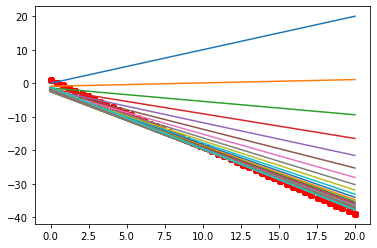

In [82]:
for i in range(len(hypoall)):
    plt.plot(x,hypoall[i])
    plt.scatter(x,y,color="Red")
plt.show()

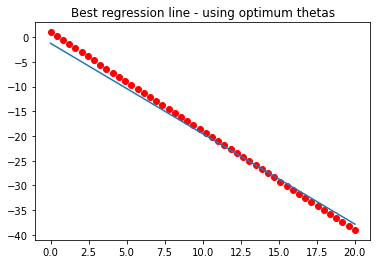

In [83]:
plt.scatter(x,y,color="red")
plt.plot(x,hypo)
plt.title('Best regression line - using optimum thetas')
plt.show()

In [87]:
theta0all,theta1all,loss,hypo,hypoall,theta0,theta1 = Adagrad(x,y,0.5,1e-8,1000)

it took 706 iterations


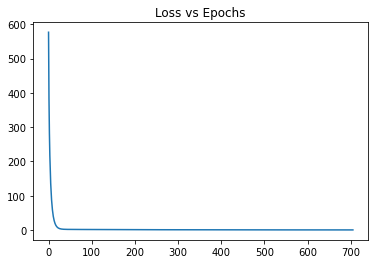

In [88]:
plt.plot(loss) 
plt.title('Loss vs Epochs')
plt.show()

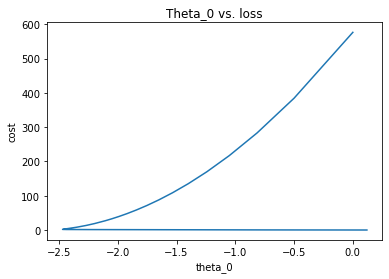

In [89]:
plt.plot(theta0all, loss)
plt.xlabel('theta_0')
plt.ylabel('cost')
plt.title('Theta_0 vs. loss')
plt.show()

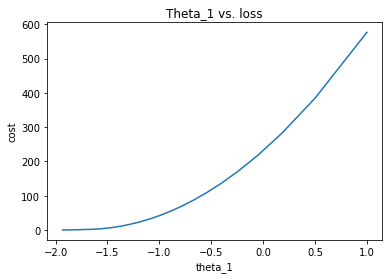

In [90]:
plt.plot(theta1all, loss)
plt.xlabel('theta_1')
plt.ylabel('cost')
plt.title('Theta_1 vs. loss')
plt.show()

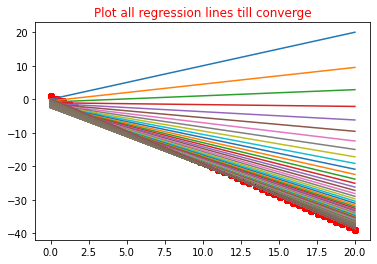

In [91]:
for i in range(len(hypoall)):
    plt.plot(x,hypoall[i])
    plt.scatter(x,y,color="Red")
    plt.title("Plot all regression lines till converge" , color = 'red')
plt.show()

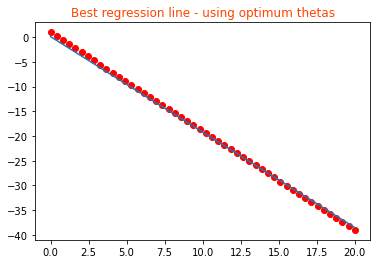

In [92]:
plt.scatter(x,y,color="red")
plt.plot(x,hypo)
plt.title('Best regression line - using optimum thetas' , color = 'orangered')
plt.show()

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

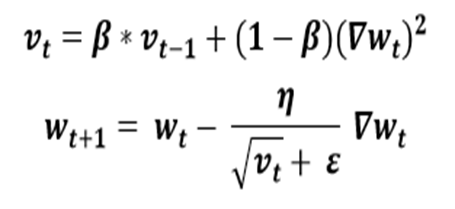

In [99]:
def RMS(x,y,alpha,epslon,Max_iterations,beta):
    theta0=0
    theta1=1
    v0=0
    v1=0
    m=len(x)
    theta0all=[]
    theta1all=[]
    loss=[]
    hypoall=[]
    
    for i in range(Max_iterations):
        hypo=theta0 + theta1 * x
        hypoall.append(hypo)
        
        cost=(1/(2*m))*np.sum((hypo-y)**2)
        loss.append(cost)

        theta0all.append(theta0)
        theta1all.append(theta1)
        
        gradient0=(1/m)*np.sum(hypo-y)
        v0 = beta * v0 + (1-beta) *(gradient0**2)
        theta0 = theta0 - (alpha/(np.sqrt(v0)+epslon)*gradient0)
        
        gradient1=(1/m)*np.sum((hypo-y)*x)
        v1 = beta * v1 + (1-beta) * (gradient1**2)
        theta1 = theta1 - (alpha/(np.sqrt(v1)+epslon)*gradient1)
        
        if cost < 0.1:
            print(f"it took {i} iterations")
            break
    return theta0all,theta1all,loss,hypo,hypoall,theta0,theta1
    

In [100]:
theta0all,theta1all,loss,hypo,hypoall,theta0,theta1 = RMS(x,y,0.25,1e-8,100,0.9)

it took 58 iterations


In [101]:
r2_1 = r2_score(hypo ,y )
print(r2_1)

0.9985617943494621


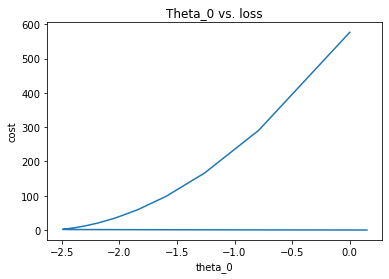

In [102]:
plt.plot(theta0all, loss)
plt.xlabel('theta_0')
plt.ylabel('cost')
plt.title('Theta_0 vs. loss')
plt.show()

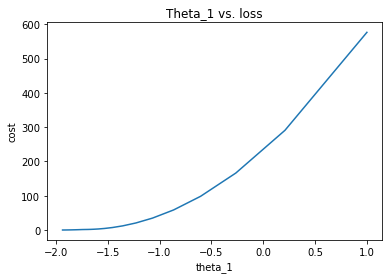

In [103]:
plt.plot(theta1all, loss)
plt.xlabel('theta_1')
plt.ylabel('cost')
plt.title('Theta_1 vs. loss')
plt.show()

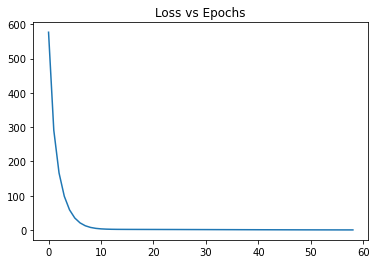

In [104]:
plt.plot(loss) 
plt.title('Loss vs Epochs')
plt.show()

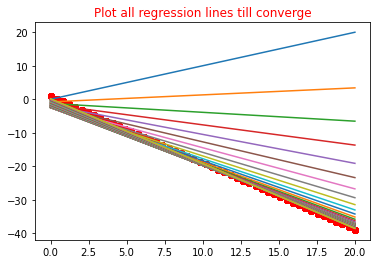

In [105]:
for i in range(len(hypoall)):
    plt.plot(x,hypoall[i])
    plt.scatter(x,y,color="Red")
    plt.title("Plot all regression lines till converge" , color = 'red')
plt.show()

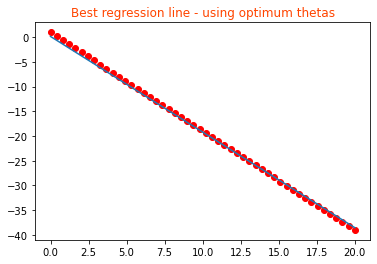

In [106]:
plt.scatter(x,y,color="red")
plt.plot(x,hypo)
plt.title('Best regression line - using optimum thetas' , color = 'orangered')
plt.show()

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

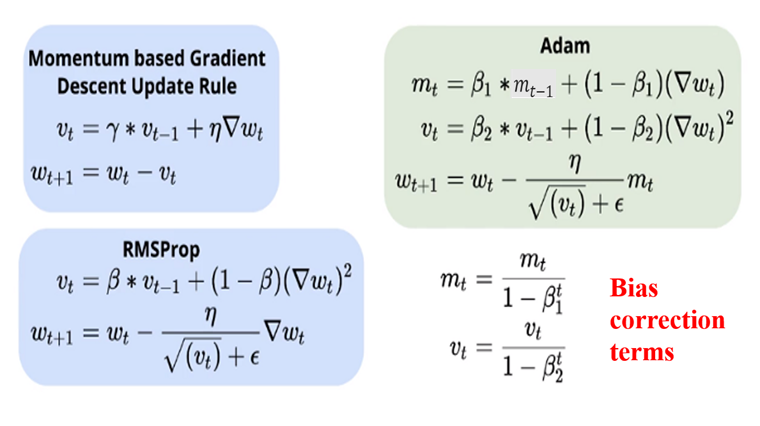

In [107]:
def Adam (x,y,alpha,epslon,Max_iterations,beta1,beta2):
    theta0=0
    theta1=1
    v0=0
    v1=0
    m0=0
    m1=0
    m=len(x)
    theta0all=[]
    theta1all=[]
    loss=[]
    hypoall=[]
    
    for i in range(Max_iterations):
        hypo=theta0 + theta1 * x
        hypoall.append(hypo)
        
        cost=(1/(2*m))*np.sum((hypo-y)**2)
        loss.append(cost)
        theta0all.append(theta0)
        theta1all.append(theta1)
        gradient0=(1/m)*np.sum(hypo-y)
        m0= beta1 * m0 + (1-beta1) * (gradient0)
        v0 = beta2 *v0 + (1-beta2) * (gradient0**2)
        theta0 = theta0 - (alpha/(np.sqrt(v0)+epslon)*m0)     
        gradient1=(1/m)*np.sum((hypo-y)*x)
        m1= beta1 * m1 + (1-beta1) * (gradient1)
        v1 = beta2 * v1 + (1-beta2) * (gradient1**2)
        theta1 = theta1 - (alpha/(np.sqrt(v1)+epslon)*m1)
        
        if cost < 0.1:
            print(f"It took {i+1} iterations")
            break
            
    return theta0all,theta1all,loss,hypo,hypoall,theta0,theta1
    

In [112]:
theta0all,theta1all,loss,hypo,hypoall,theta0,theta1 = Adam(x,y,0.3,1e-8,350,0.7,0.9)

It took 59 iterations


In [113]:
r2 = r2_score(hypo , y)
r2

0.9986406270143386

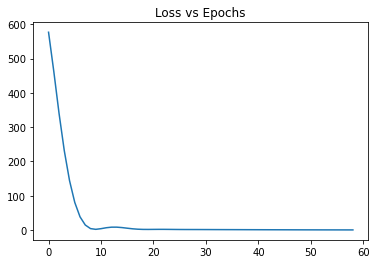

In [114]:
plt.plot(loss) 
plt.title('Loss vs Epochs')
plt.show()

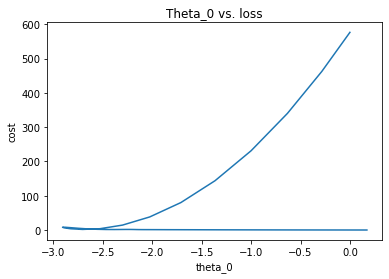

In [115]:
plt.plot(theta0all, loss)
plt.xlabel('theta_0')
plt.ylabel('cost')
plt.title('Theta_0 vs. loss')
plt.show()

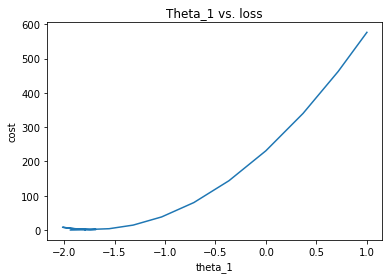

In [117]:
plt.plot(theta1all, loss)
plt.xlabel('theta_1')
plt.ylabel('cost')
plt.title('Theta_1 vs. loss')
plt.show()

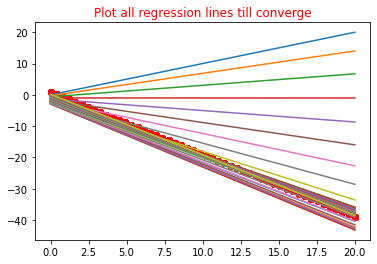

In [118]:
for i in range(len(hypoall)):
    plt.plot(x,hypoall[i])
    plt.scatter(x,y,color="Red")
    plt.title("Plot all regression lines till converge" , color = 'red')
plt.show()

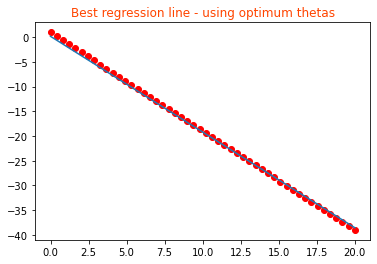

In [119]:
plt.scatter(x,y,color="red")
plt.plot(x,hypo)
plt.title('Best regression line - using optimum thetas' , color = 'orangered')
plt.show()

## Congratulations 
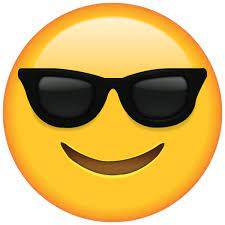